In [19]:
pip install umap-learn

     |████████████████████████████████| 90 kB 7.8 MB/s eta 0:00:011
  Using cached pynndescent-0.5.10-py3-none-any.whl
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86836 sha256=2b1965bc37f0cda1c9ac3b310a8ae693bf90e6fd46590688e2942408cfeffb4f
  Stored in directory: /Users/mellitaangga/Library/Caches/pip/wheels/0f/01/17/26951217a11fb724b7027c6dd5b620b6d368104f7e6d4171fc
Successfully built umap-learn
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt 
import seaborn as sns


In [27]:
data = pd.read_csv('Datasets/KDDTrain+.txt', header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [28]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

data.columns = columns

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [30]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [31]:
difficulty_level = data['level']
data.drop(columns= ['level'], inplace=True)

In [32]:
categorical_cols = ['protocol_type', 'service', 'flag']
binary_cols = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
target = ['attack']
non_numerical_cols = binary_cols + categorical_cols + target
numerical_cols = [col for col in data.columns if col not in non_numerical_cols ]

In [33]:
# Initialize One-Hot Encoder
encoder = OneHotEncoder(handle_unknown="ignore")

## Protocol type
# Fit encoder on training data (returns a separate DataFrame)
data_ohe = pd.DataFrame(encoder.fit_transform(data[["protocol_type"]]).toarray())
data_ohe.columns = [("protocol_type_" + col) for col in encoder.categories_[0]]

# Join encoded data with original training data
data = pd.concat([data, data_ohe], axis=1)
data.drop(columns=['protocol_type'], inplace=True)

## Flag
# Fit encoder on training data (returns a separate DataFrame)
data_ohe = pd.DataFrame(encoder.fit_transform(data[["flag"]]).toarray())
data_ohe.columns = [("flag_" + col) for col in encoder.categories_[0]]

# Join encoded data with original training data
data = pd.concat([data, data_ohe], axis=1)
data.drop(columns=['flag'], inplace=True)

# Fit Frequency encoder on training data
encoder = ce.CountEncoder(cols="service", normalize=True)

data["service_encoded_freq"] = encoder.fit_transform(data["service"])

data.drop(columns=['service'], inplace=True)

In [34]:
# Target Encoding
#Mapping all attack types to their categories
dos_attacks = ['back','land','neptune','pod','smurf','teardrop', 'apache2', 'udpstorm', 'processtable', 'worm', 'mailbomb']
probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']
R2L_attacks = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named']
U2R_attacks = ['rootkit', 'buffer_overflow', 'loadmodule', 'perl', 'sqlattack', 'xterm', 'ps']

def attack_category(attack):
    if attack in dos_attacks:
        attack_type = 1
    elif attack in probe_attacks:
        attack_type = 2
    elif attack in R2L_attacks:
        attack_type = 3
    elif attack in U2R_attacks:
        attack_type = 4
    elif attack == 'normal':
        attack_type = 0
    else:
        return -1
    return attack_type

data['attack_category'] = data['attack'].apply(attack_category)
data.loc[data['attack_category'] > 0, 'is_attack'] = 1
data.loc[data['attack_category'] == 0, 'is_attack'] = 0

In [ ]:
# # scaling numerical variables with minmax Scaler
# scaler = MinMaxScaler()

# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

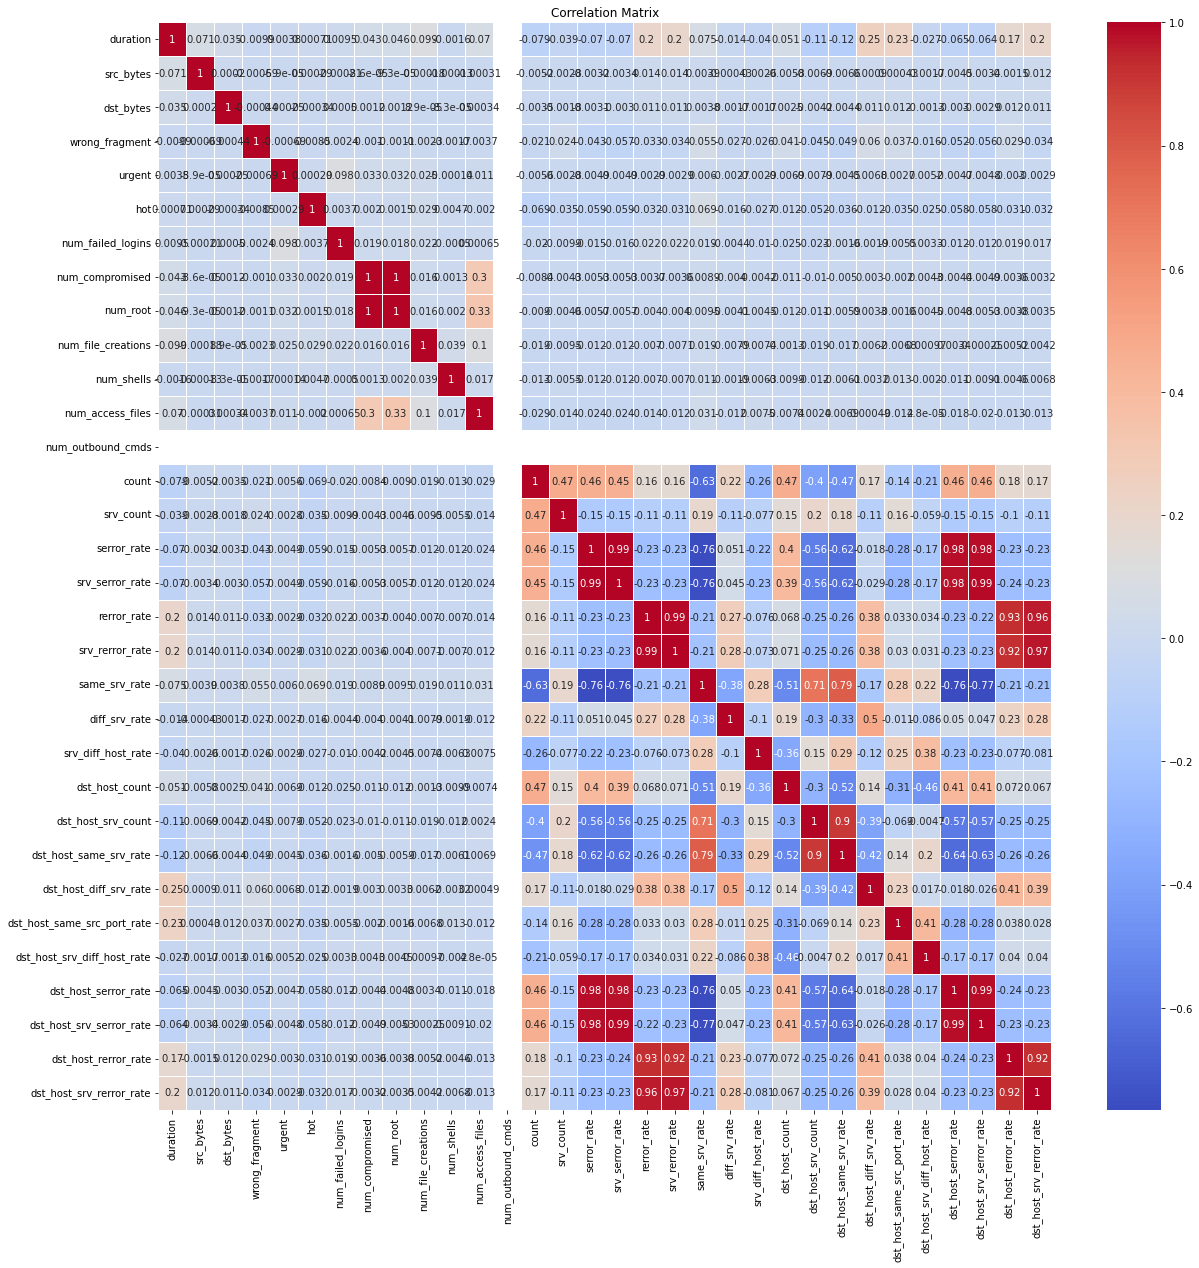

In [35]:
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='TSNE.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=42).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(10,10))
    
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='dos'
    )
    
    ax.scatter(
        *zip(*features_embedded[np.where(labels==2)]),
        marker='o',
        color='orange',
        s=2,
        alpha=0.7,
        label='probe'
    )
    
    ax.scatter(
        *zip(*features_embedded[np.where(labels==3)]),
        marker='o',
        color='b',
        s=2,
        alpha=0.7,
        label='R2L'
    )
    
    ax.scatter(
        *zip(*features_embedded[np.where(labels==4)]),
        marker='o',
        color='m',
        s=2,
        alpha=0.7,
        label='U2R'
    )
    
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='normal'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show;

In [36]:
features, labels = data.drop(columns= ['is_attack', 'attack_category', 'attack']), data.attack_category

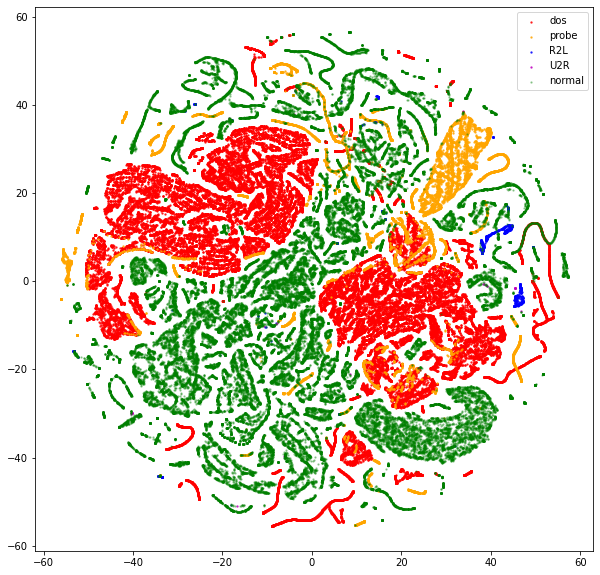

In [15]:
tsne_scatter(features, labels, dimensions=2)

In [ ]:
# tsne_scatter(features, labels, dimensions=2, save_as='tsne_initial_2d.png')

In [37]:
X = data.drop(columns = ['is_attack', 'attack_category', 'attack'])
y = data['attack_category']

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/mellitaangga/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


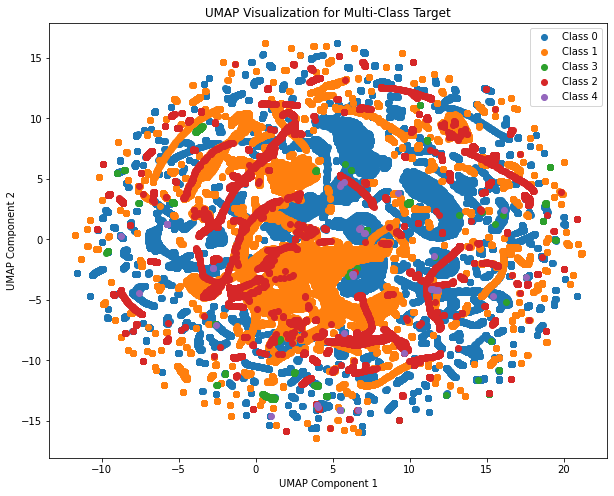

In [18]:
import umap.umap_ as umap

# Initialize UMAP with the desired number of components (2 for 2D visualization)
umap_model = umap.UMAP(n_components=2)

# Fit and transform the data
umap_result = umap_model.fit_transform(X)

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2'])
umap_df['target'] = y

# Plot the UMAP visualization
plt.figure(figsize=(10, 8))
for target_class in umap_df['target'].unique():
    target_subset = umap_df[umap_df['target'] == target_class]
    plt.scatter(target_subset['UMAP_1'], target_subset['UMAP_2'], label=f"Class {target_class}")

plt.title('UMAP Visualization for Multi-Class Target')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.savefig('UMAP.png')
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [46]:
param_grid = {
    'max_depth': [5],
    'min_samples_split': [20],
    'min_samples_leaf': [10],
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='f1_weighted', cv=10, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
Best Accuracy: 0.9824051481490272


In [47]:
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9833300257987696
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13469
           1       0.99      0.99      0.99      9186
           2       0.97      0.94      0.95      2331
           3       0.62      0.75      0.68       199
           4       0.43      0.30      0.35        10

    accuracy                           0.98     25195
   macro avg       0.80      0.79      0.79     25195
weighted avg       0.98      0.98      0.98     25195



In [50]:
data.attack_category.value_counts()

0    67343
1    45927
2    11656
3      995
4       52
Name: attack_category, dtype: int64

In [48]:
y_train.value_counts()

0    53874
1    36741
2     9325
3      796
4       42
Name: attack_category, dtype: int64

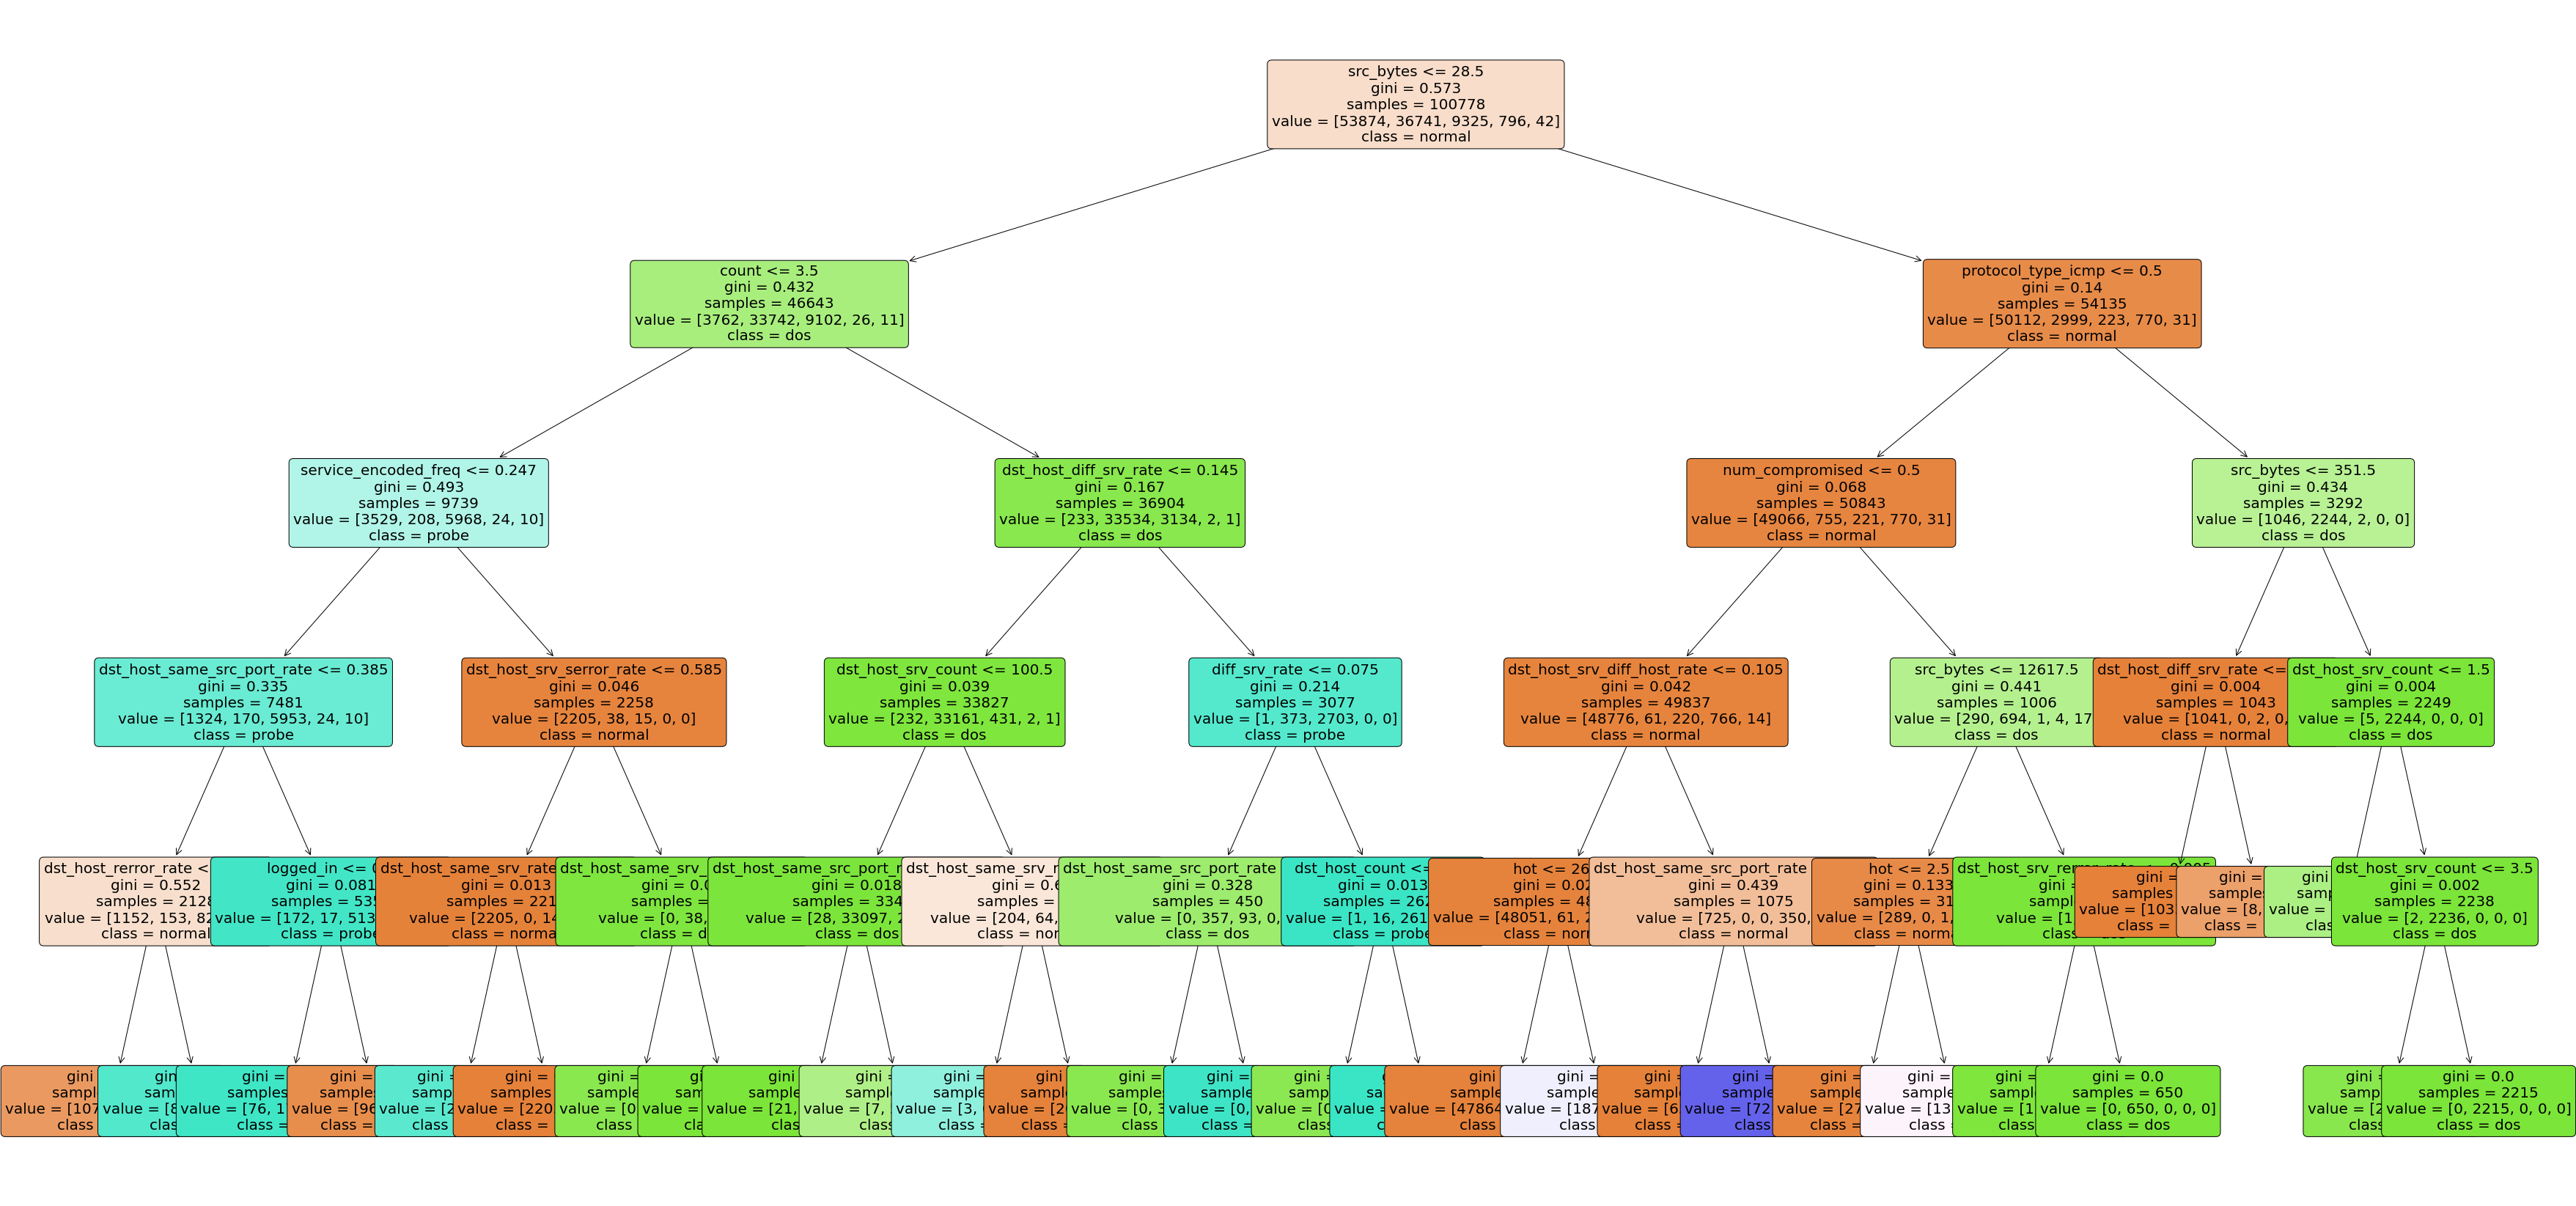

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(60,30))

plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['normal', 'dos', 'probe', 'R2L', 'U2R'],filled=True, rounded=True, fontsize=20)
plt.show()